In [ ]:
# Impor pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Muat dataset gizi anak
growth_data = pd.read_csv('data_gizi_anak.csv')

# Fitur input dan target
X = np.array(growth_data[['Usia (Tahun)', 'Kebutuhan Kalori (kcal)']])
y_height = np.array(growth_data['Tinggi Badan (cm)'])
y_weight = np.array(growth_data['Berat Badan (kg)'])

# Normalisasi data
scaler_X = MinMaxScaler()
scaler_y_height = MinMaxScaler()
scaler_y_weight = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_height_scaled = scaler_y_height.fit_transform(y_height.reshape(-1, 1))
y_weight_scaled = scaler_y_weight.fit_transform(y_weight.reshape(-1, 1))

# Split data menjadi training dan validation
X_train, X_val, y_train_height, y_val_height = train_test_split(X_scaled, y_height_scaled, test_size=0.2, random_state=42)
_, _, y_train_weight, y_val_weight = train_test_split(X_scaled, y_weight_scaled, test_size=0.2, random_state=42)

# Reshape untuk LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Model LSTM untuk Tinggi Badan
model_height = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])
model_height.compile(optimizer='adam', loss='mse')

# Model LSTM untuk Berat Badan
model_weight = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])
model_weight.compile(optimizer='adam', loss='mse')

# Callback untuk early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Pelatihan model tinggi badan
history_height = model_height.fit(
    X_train_lstm, y_train_height,
    validation_data=(X_val_lstm, y_val_height),
    epochs=200,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# Pelatihan model berat badan
history_weight = model_weight.fit(
    X_train_lstm, y_train_weight,
    validation_data=(X_val_lstm, y_val_weight),
    epochs=200,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3323 - val_loss: 0.2964
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3099 - val_loss: 0.2625
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2964 - val_loss: 0.2303
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2356 - val_loss: 0.2004
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2156 - val_loss: 0.1732
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1847 - val_loss: 0.1502
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1742 - val_loss: 0.1326
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1302 - val_loss: 0.1231
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1077 - val_loss: 0.1190
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1110 - val_loss: 0.1183
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1112 - val_loss: 0.1196
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1043 - val_l

### **Penjelasan Kode secara Detail**

Berikut adalah penjelasan langkah-langkah kode untuk membangun model prediksi tinggi badan dan berat badan anak menggunakan **TensorFlow** dan **LSTM**.

---

### **1. Impor Pustaka yang Diperlukan**
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
```

#### **Penjelasan:**
- **`pandas` dan `numpy`:** Digunakan untuk manipulasi data dan operasi numerik.
- **`train_test_split`:** Untuk membagi data menjadi bagian training dan validation.
- **`Sequential`, `Dense`, `LSTM`:** Membangun model neural network berbasis LSTM.
- **`EarlyStopping`:** Untuk menghentikan pelatihan model secara otomatis ketika performa pada data validasi tidak membaik.
- **`MinMaxScaler`:** Untuk normalisasi data ke rentang 0–1 agar model lebih stabil.

---

### **2. Membaca Dataset Gizi Anak**
```python
growth_data = pd.read_csv('data_gizi_anak.csv')
```

#### **Penjelasan:**
- **Dataset:** File CSV berisi data anak, seperti usia, kebutuhan kalori, tinggi badan, dan berat badan.

---

### **3. Menentukan Fitur Input dan Target**
```python
X = np.array(growth_data[['Usia (Tahun)', 'Kebutuhan Kalori (kcal)']])
y_height = np.array(growth_data['Tinggi Badan (cm)'])
y_weight = np.array(growth_data['Berat Badan (kg)'])
```

#### **Penjelasan:**
- **Input (`X`):** Menggunakan usia dan kebutuhan kalori sebagai variabel input.
- **Target:**
  - **`y_height`:** Prediksi tinggi badan anak.
  - **`y_weight`:** Prediksi berat badan anak.

---

### **4. Normalisasi Data**
```python
scaler_X = MinMaxScaler()
scaler_y_height = MinMaxScaler()
scaler_y_weight = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_height_scaled = scaler_y_height.fit_transform(y_height.reshape(-1, 1))
y_weight_scaled = scaler_y_weight.fit_transform(y_weight.reshape(-1, 1))
```

#### **Penjelasan:**
- **`MinMaxScaler`:** Mengubah nilai data ke rentang 0–1 untuk mempercepat pelatihan dan mencegah model overfitting.
- **`fit_transform`:** Melakukan fitting scaler ke data sekaligus mengaplikasikan transformasi.
- **`reshape`:** Mengubah data target menjadi array 2D yang sesuai untuk model.

---

### **5. Membagi Data menjadi Training dan Validation**
```python
X_train, X_val, y_train_height, y_val_height = train_test_split(X_scaled, y_height_scaled, test_size=0.2, random_state=42)
_, _, y_train_weight, y_val_weight = train_test_split(X_scaled, y_weight_scaled, test_size=0.2, random_state=42)
```

#### **Penjelasan:**
- **`train_test_split`:** Membagi data menjadi:
  - **Training:** Digunakan untuk melatih model.
  - **Validation:** Digunakan untuk mengevaluasi performa model.
- **`test_size=0.2`:** Sebanyak 20% data digunakan untuk validasi.

---

### **6. Reshape Data untuk LSTM**
```python
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
```

#### **Penjelasan:**
- **Reshape:** Model LSTM membutuhkan data dalam bentuk 3 dimensi: `(samples, timesteps, features)`.
  - **`samples`:** Jumlah sampel.
  - **`timesteps`:** 1 (karena data tidak bersifat sekuensial dalam waktu).
  - **`features`:** 2 (usia dan kebutuhan kalori).

---

### **7. Membangun Model LSTM**
```python
model_height = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])
model_height.compile(optimizer='adam', loss='mse')
```

#### **Penjelasan:**
- **Lapisan LSTM:**
  - **50 units:** Jumlah unit di lapisan LSTM.
  - **`relu`:** Fungsi aktivasi untuk menangani non-linearitas.
  - **`input_shape`:** Bentuk input data: `(1 timestep, 2 features)`.
- **Lapisan Dense:**
  - **1 unit:** Output berupa prediksi tunggal (tinggi badan atau berat badan).
- **Kompilasi Model:**
  - **`optimizer='adam'`:** Optimizer yang adaptif dan cepat.
  - **`loss='mse'`:** Mean Squared Error digunakan sebagai fungsi loss.

---

### **8. Callback untuk Early Stopping**
```python
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
```

#### **Penjelasan:**
- **`monitor='val_loss'`:** Menghentikan pelatihan jika loss validasi tidak membaik.
- **`patience=10`:** Model berhenti setelah 10 epoch tanpa peningkatan performa.
- **`restore_best_weights=True`:** Mengembalikan bobot terbaik dari epoch sebelumnya.

---

### **9. Pelatihan Model**
```python
history_height = model_height.fit(
    X_train_lstm, y_train_height,
    validation_data=(X_val_lstm, y_val_height),
    epochs=200,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)
```

#### **Penjelasan:**
- **`fit`:** Melatih model dengan data training dan validasi.
- **`epochs=200`:** Maksimum iterasi pelatihan adalah 200 epoch.
- **`batch_size=16`:** Data dibagi menjadi batch sebanyak 16 sampel per iterasi.

---

In [ ]:
# Prediksi data validasi
predicted_height_val = model_height.predict(X_val_lstm)
predicted_weight_val = model_weight.predict(X_val_lstm)

# Invers transform untuk mendapatkan nilai asli
predicted_height_val = scaler_y_height.inverse_transform(predicted_height_val)
predicted_weight_val = scaler_y_weight.inverse_transform(predicted_weight_val)

# Contoh prediksi masa depan untuk usia tertentu
future_age = np.array([[4, 1500]])  # Usia 4 tahun dan konsumsi 1500 kcal
future_age_scaled = scaler_X.transform(future_age)
future_age_lstm = future_age_scaled.reshape((future_age_scaled.shape[0], 1, future_age_scaled.shape[1]))

predicted_future_height = scaler_y_height.inverse_transform(model_height.predict(future_age_lstm))
predicted_future_weight = scaler_y_weight.inverse_transform(model_weight.predict(future_age_lstm))

print(f"Prediksi Tinggi Badan: {predicted_future_height[0][0]:.2f} cm")
print(f"Prediksi Berat Badan: {predicted_future_weight[0][0]:.2f} kg")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediksi Tinggi Badan: 119.11 cm
Prediksi Berat Badan: 11.76 kg




### **10. Prediksi dan Inverse Transform**
```python
predicted_height_val = model_height.predict(X_val_lstm)
predicted_height_val = scaler_y_height.inverse_transform(predicted_height_val)
```

#### **Penjelasan:**
- **Prediksi:** Model menghasilkan nilai prediksi untuk data validasi.
- **Inverse Transform:** Mengembalikan nilai prediksi ke skala asli (cm atau kg).

---

### **11. Visualisasi Performa Model**
```python
plt.figure(figsize=(10, 5))
plt.plot(history_height.history['loss'], label='Training Loss')
plt.plot(history_height.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Tinggi Badan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
```

#### **Penjelasan:**
- Menampilkan kurva loss untuk data training dan validasi agar dapat melihat performa model selama pelatihan.

---

### **Kesimpulan**
- **Model LSTM:** Digunakan untuk memprediksi tinggi dan berat badan berdasarkan usia dan konsumsi kalori.
- **Normalisasi:** Data dinormalisasi untuk meningkatkan performa model.
- **Validasi:** Data validasi memastikan model tidak overfitting.
- **Visualisasi:** Membantu memahami performa model selama pelatihan.

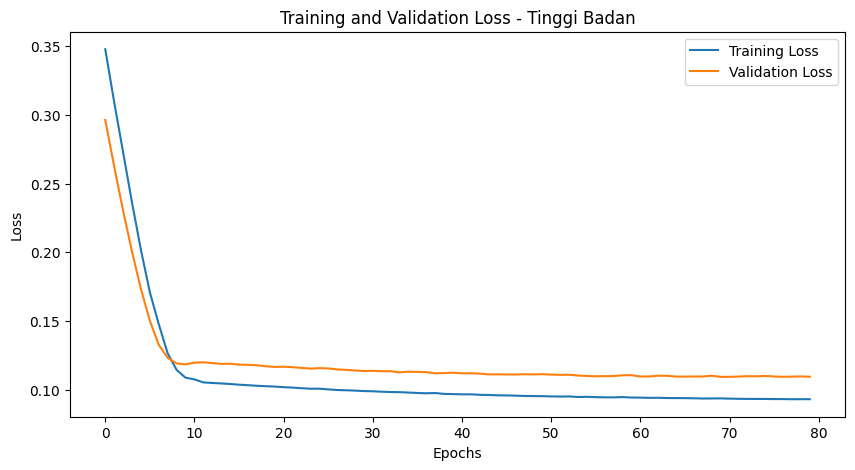

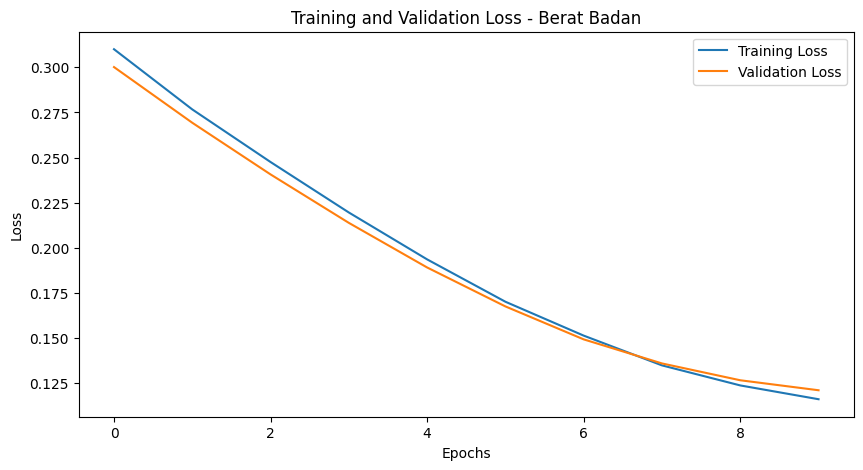

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss untuk Model Tinggi Badan
plt.figure(figsize=(10, 5))
plt.plot(history_height.history['loss'], label='Training Loss')
plt.plot(history_height.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Tinggi Badan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Loss untuk Model Berat Badan
plt.figure(figsize=(10, 5))
plt.plot(history_weight.history['loss'], label='Training Loss')
plt.plot(history_weight.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Berat Badan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
